In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
from port_opt import fetch, expected_returns, risk_models, plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tickers = [
    "AAPL", "AMD", "AMZN", "BABA", "BAC", "BBY", "GE", "GM",
    "GOOG", "JPM", "MA", "META", "PFE", "RRC", "SBUX", "T",
    "UAA", "WMT", "XOM"
]
data = fetch.get_stock_data(tickers,"2008-01-01","2022-01-01")
print(data)

/Users/wenyuc/Dev/QuantDev/portfolio_opt/port_opt/fetch.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  19 of 19 completed

Ticker            AAPL         AMD        AMZN        BABA        BAC  \
Date                                                                    
2014-09-19   22.306963    3.810000   16.566000   89.166870  13.480301   
2014-09-22   22.329058    3.760000   16.225000   85.368088  13.543924   
2014-09-23   22.678152    3.690000   16.181499   82.784912  13.559827   
2014-09-24   22.481514    3.700000   16.410500   86.013878  13.663220   
2014-09-25   21.624233    3.630000   16.096500   84.446877  13.400769   
...                ...         ...         ...         ...        ...   
2021-12-27  176.796051  154.360001  169.669495  110.724937  40.532707   
2021-12-28  175.776413  153.149994  170.660995  109.024994  40.587200   
2021-12-29  175.864685  148.259995  169.201004  106.451309  40.523636   
2021-12-30  174.707809  145.149994  168.644501  116.802986  40.432835   
2021-12-31  174.090179  143.899994  166.716995  112.814270  40.396519   

Ticker            BBY          GE         GM      

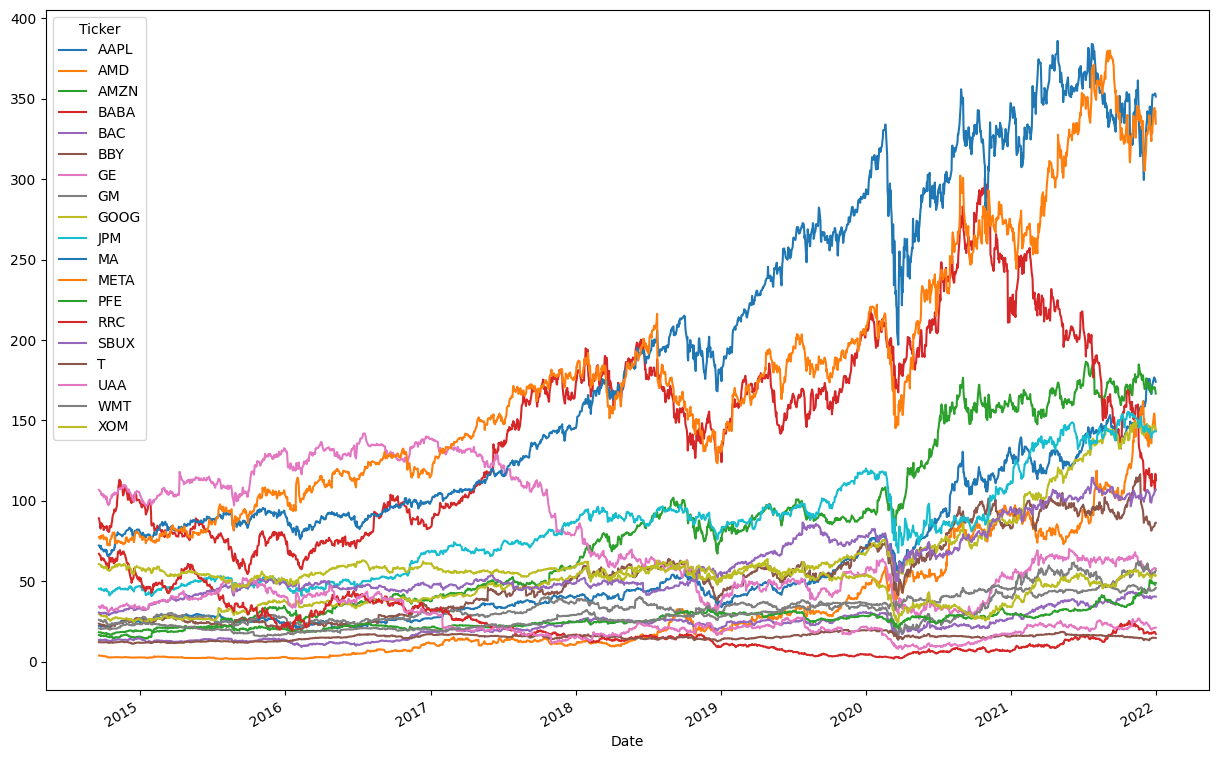

In [4]:
data[data.index >= "2008-01-01"].plot(figsize=(15,10));

In [5]:
sample_cov = risk_models.sample_cov(data, frequency=252)
sample_cov

Ticker,AAPL,AMD,AMZN,BABA,BAC,BBY,GE,GM,GOOG,JPM,MA,META,PFE,RRC,SBUX,T,UAA,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,
AAPL,0.082778,0.065210,0.047775,0.039759,0.039279,0.040718,0.033170,0.034217,0.045086,0.035539,0.046473,0.050938,0.021640,0.032623,0.034975,0.020298,0.037414,0.020693,0.028308
AMD,0.065210,0.364504,0.061891,0.062401,0.051640,0.057495,0.039934,0.047121,0.049659,0.041670,0.058318,0.057088,0.026969,0.066696,0.038861,0.023198,0.052137,0.021774,0.035426
AMZN,0.047775,0.061891,0.090216,0.044508,0.026748,0.030062,0.020745,0.022700,0.050578,0.022953,0.040605,0.054774,0.015723,0.026505,0.030606,0.013319,0.032247,0.016260,0.018396
BABA,0.039759,0.062401,0.044508,0.124345,0.032468,0.033338,0.028593,0.034644,0.039248,0.027750,0.038635,0.044177,0.012993,0.037264,0.025296,0.012409,0.038119,0.011316,0.024110
BAC,0.039279,0.051640,0.026748,0.032468,0.103054,0.050433,0.064596,0.065985,0.037386,0.082817,0.051886,0.035442,0.027950,0.073735,0.042820,0.034869,0.070012,0.017745,0.056457
BBY,0.040718,0.057495,0.030062,0.033338,0.050433,0.140469,0.041194,0.053731,0.030584,0.042879,0.041534,0.031870,0.017766,0.053961,0.033678,0.025854,0.065152,0.020926,0.034944
GE,0.033170,0.039934,0.020745,0.028593,0.064596,0.041194,0.131561,0.061643,0.029653,0.057829,0.043176,0.030364,0.023511,0.065215,0.036973,0.033340,0.061454,0.013158,0.053796
GM,0.034217,0.047121,0.022700,0.034644,0.065985,0.053731,0.061643,0.120137,0.034682,0.059055,0.045611,0.034533,0.020727,0.063901,0.039825,0.030602,0.068651,0.012857,0.050325
GOOG,0.045086,0.049659,0.050578,0.039248,0.037386,0.030584,0.029653,0.034682,0.069046,0.033314,0.044787,0.053650,0.020617,0.025755,0.034863,0.019304,0.039353,0.016416,0.028488


<Axes: >

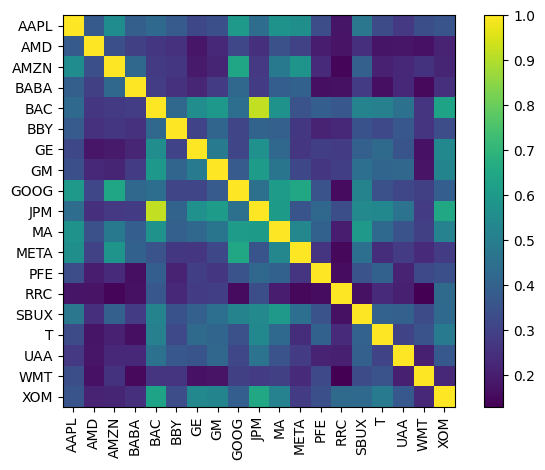

In [6]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

Return Estimation

In [7]:
mu = expected_returns.capm_return(data)
mu

Ticker
AAPL    0.183534
AMD     0.296312
AMZN    0.161642
BABA    0.172495
BAC     0.234074
BBY     0.205284
GE      0.210938
GM      0.218464
GOOG    0.170337
JPM     0.205472
MA      0.198166
META    0.182353
PFE     0.104066
RRC     0.291576
SBUX    0.162015
T       0.116914
UAA     0.261266
WMT     0.084116
XOM     0.179616
Name: mkt, dtype: float64

<Axes: ylabel='Ticker'>

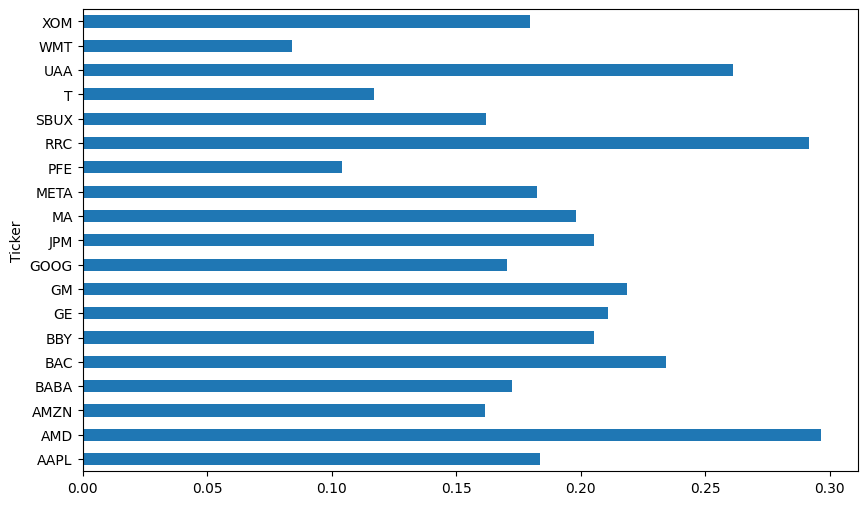

In [8]:
mu.plot.barh(figsize=(10,6))

In [9]:
from port_opt.efficient_frontier.efficient_frontier import EfficientFrontier

In [10]:
S = risk_models.risk_matrix(data, "sample_cov")

ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', -0.01923),
             ('AMD', -0.01602),
             ('AMZN', 0.0818),
             ('BABA', 0.08068),
             ('BAC', -0.1467),
             ('BBY', 0.01844),
             ('GE', 0.00336),
             ('GM', 0.01968),
             ('GOOG', 0.01781),
             ('JPM', 0.08896),
             ('MA', -0.07007),
             ('META', 0.03475),
             ('PFE', 0.22285),
             ('RRC', -0.00602),
             ('SBUX', 0.08393),
             ('T', 0.2423),
             ('UAA', -0.02261),
             ('WMT', 0.28714),
             ('XOM', 0.09895)])

<Axes: >

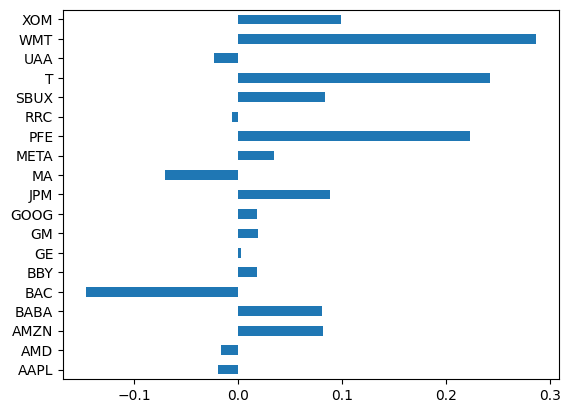

In [11]:
pd.Series(weights).plot.barh()

Max Sharpe

In [12]:
mu = expected_returns.capm_return(data)
S = risk_models.risk_matrix(data,"sample_cov")

ef = EfficientFrontier(mu, S, weight_bounds=(0,1))

ef.max_sharpe()
weights = ef.clean_weights()

In [13]:
weights

OrderedDict([('AAPL', 0.05263),
             ('AMD', 0.05263),
             ('AMZN', 0.05263),
             ('BABA', 0.05263),
             ('BAC', 0.05263),
             ('BBY', 0.05263),
             ('GE', 0.05263),
             ('GM', 0.05263),
             ('GOOG', 0.05263),
             ('JPM', 0.05263),
             ('MA', 0.05263),
             ('META', 0.05263),
             ('PFE', 0.05263),
             ('RRC', 0.05263),
             ('SBUX', 0.05263),
             ('T', 0.05263),
             ('UAA', 0.05263),
             ('WMT', 0.05263),
             ('XOM', 0.05263)])

In [14]:
from port_opt.cla import CLA

In [15]:
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)

Expected annual return: 19.2%
Annual volatility: 20.4%
Sharpe Ratio: 0.94


(0.19150736443673905, 0.20388023402367803, 0.9393130499080061)

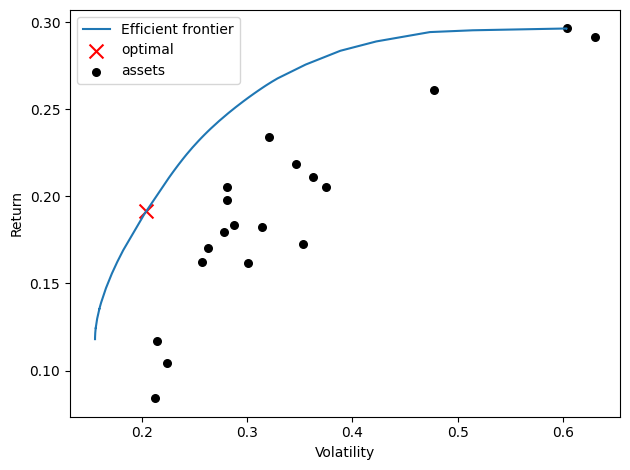

In [16]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)